In [137]:
# Assignment 1 - Data Exploration: StreamFlow

In [138]:
# Load the toolboxes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# Load the data file
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [140]:
# 1. Churned analysis and pie chart
# 1. Churned analysis and pie chart
def churned_analysis_pie_chart(df):
    def categorize_diff(days):
        if days <= 30:
            return '≤ 30 days'
        elif days <= 90:
            return '31-90 days'
        elif days <= 180:
            return '91-180 days'
        elif days <= 360:
            return '181-360 days'
        else:
            return '> 360 days'

    churned_df = df[df['Churned'] == 1]
    churned_df['Subscription_Start_Date'] = pd.to_datetime(churned_df['Subscription_Start_Date'])
    churned_df['Date_of_Churn'] = pd.to_datetime(churned_df['Date_of_Churn'])
    churned_df['Days_Diff'] = (churned_df['Date_of_Churn'] - churned_df['Subscription_Start_Date']).dt.days
    churned_df['Days_Category'] = churned_df['Days_Diff'].apply(categorize_diff)

    category_counts = churned_df['Days_Category'].value_counts()
    category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Churned Days Difference Categories')
    plt.ylabel('')
    plt.show()

In [141]:
# 2. Standard Subscription Churn Reasons pie chart
def standard_subscription_churn_reasons_pie_chart(df):
    standard_churned = df[(df['Subscription_Type'] == 'Standard') & (df['Churned'] == 1)]
    reason_counts = standard_churned['Reason_for_Churn'].value_counts(normalize=True) * 100

    reason_counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Reasons for Churn (Standard Subscription)')
    plt.ylabel('')
    plt.show()


In [142]:
# 3. Favorite Genre distribution among Standard Churned users
def favorite_genre_distribution_bar_chart(df):
    standard_churned = df[(df['Subscription_Type'] == 'Standard') & (df['Churned'] == 1)]
    favorite_genre_counts = standard_churned['Favorite_Genre'].value_counts()
    total_favorite_genre_counts = df['Favorite_Genre'].value_counts()
    percentage_favorite_genre = favorite_genre_counts / total_favorite_genre_counts * 100

    percentage_favorite_genre.plot.bar()
    plt.title('Favorite Genre Percentage among Standard Churned Users')
    plt.ylabel('Percentage')
    plt.xlabel('Favorite Genre')
    plt.show()


In [143]:
# 4. Average Session Length comparison by Favorite Genre
def average_session_length_comparison_bar_chart(df):
    average_session_length_churned = df[df['Churned'] == 1].groupby('Favorite_Genre')['Average_Session_Length'].mean()
    average_session_length_non_churned = df[df['Churned'] == 0].groupby('Favorite_Genre')['Average_Session_Length'].mean()
    session_length_ratio = average_session_length_churned / average_session_length_non_churned

    session_length_ratio.plot.bar()
    plt.title('Average Session Length Ratio (Churned vs Non-Churned)')
    plt.ylabel('Ratio')
    plt.xlabel('Favorite Genre')
    plt.show()

In [144]:
# 5. Gender distribution among Churned users
def gender_distribution_bar_chart(df):
    gender_counts_churned = df[df['Churned'] == 1]['Gender'].value_counts()
    total_gender_counts = df['Gender'].value_counts()
    gender_percentage_churned = gender_counts_churned / total_gender_counts * 100

    gender_percentage_churned.plot.bar()
    plt.title('Gender Distribution among Churned Users')
    plt.ylabel('Percentage')
    plt.xlabel('Gender')
    plt.show()

In [145]:
# 6. Location distribution among Churned users
def location_distribution_bar_chart(df):
    location_counts_churned = df[df['Churned'] == 1]['Location'].value_counts()
    total_location_counts = df['Location'].value_counts()
    location_percentage_churned = location_counts_churned / total_location_counts * 100

    location_percentage_churned.plot.bar()
    plt.title('Location Distribution among Churned Users')
    plt.ylabel('Percentage')
    plt.xlabel('Location')
    plt.show()

C:\Users\NeilXu\AppData\Local\Temp\ipykernel_1072\1933928780.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['Subscription_Start_Date'] = pd.to_datetime(churned_df['Subscription_Start_Date'])
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_1072\1933928780.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['Date_of_Churn'] = pd.to_datetime(churned_df['Date_of_Churn'])
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_1072\1933928780.py:19: SettingWithCopyWarning: 
A value is trying to be

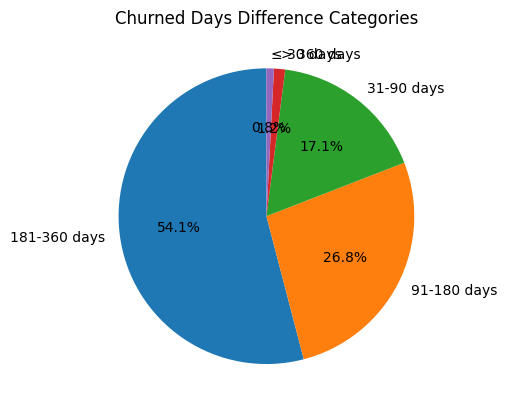

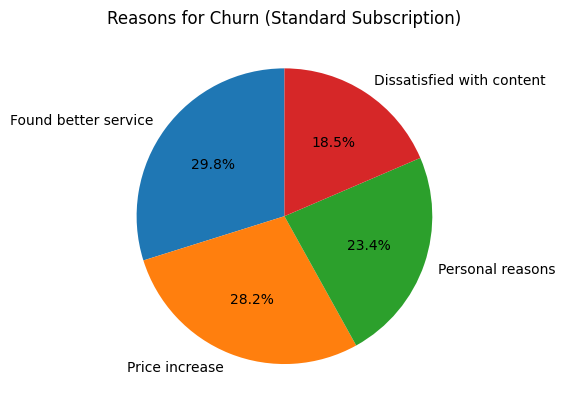

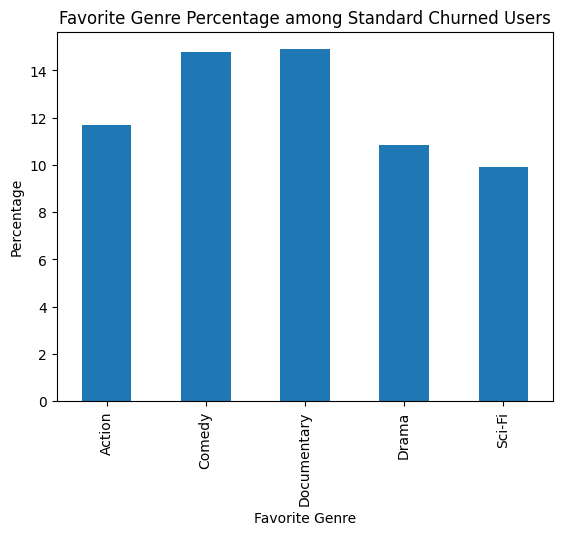

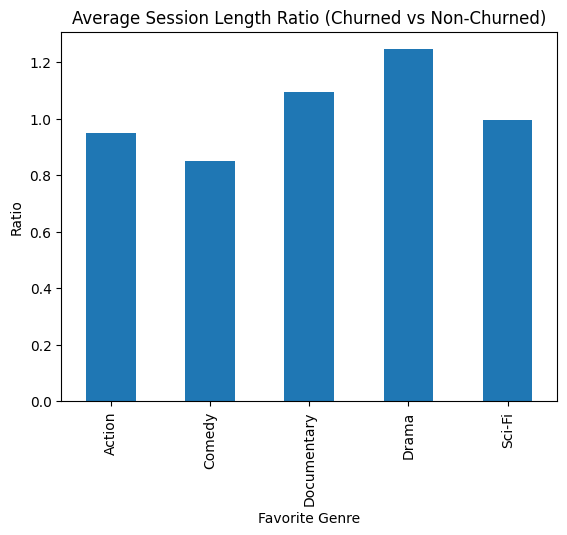

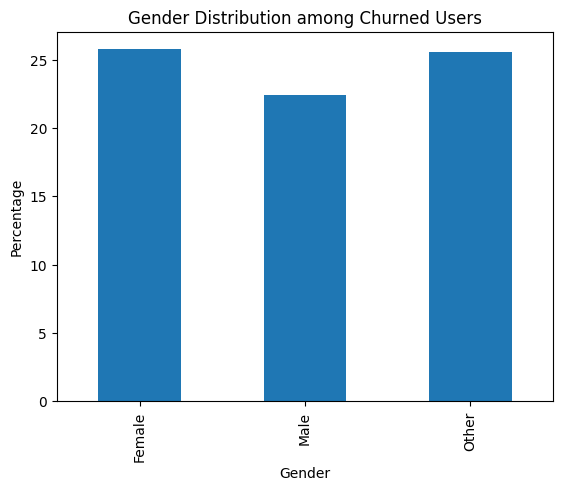

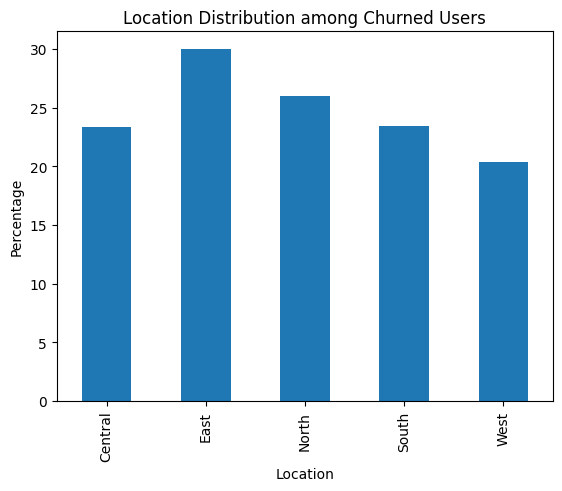

In [146]:
# Execute each function independently
churned_analysis_pie_chart(df)
standard_subscription_churn_reasons_pie_chart(df)
favorite_genre_distribution_bar_chart(df)
average_session_length_comparison_bar_chart(df)
gender_distribution_bar_chart(df)
location_distribution_bar_chart(df)